In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns


sns.set_palette("Paired_r")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
params= {'text.latex.preamble' : r'\usepackage{amsmath}'}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25

cm_to_in = 1/2.54

In [2]:
def plot_chains(rto_samples, nuts_samples):
    f,axes = plt.subplots(3,2, sharex=True, figsize=(71.2/2*cm_to_in,27*1.5*1.5*cm_to_in), layout="constrained")

    print(rto_samples.shape)
    print(nuts_samples.shape)

    axes[0,0].set_title(r'RTO',fontsize=35)
    axes[0,1].set_title(r'NUTS',fontsize=35)

    indecies = [102, 307, 384]
    loc = [0.2, 0.6, 0.75]

    for i, idx in enumerate(indecies) :
        axes[i,0].plot(rto_samples[:,idx],linewidth=2,color='mediumslateblue')
        axes[i,1].plot(nuts_samples[:,idx],linewidth=2,color='mediumslateblue')
        axes[i,0].set_ylabel(r'$x$={}'.format(loc[i]), fontsize=35)

    axes[2,0].set_xlabel(r'Sample index'.format(loc[i]),fontsize=35)
    axes[2,1].set_xlabel(r'Sample index',fontsize=35)

    plt.tight_layout()

    plt.savefig('Figure6.pdf',dpi = 300)
    plt.show()

def plot_uq(rto_samples, nuts_samples):
    mean_rto = np.mean(rto_samples, axis=0)
    mean_nuts = np.mean(nuts_samples, axis=0)

    f,axes = plt.subplots(2,2, sharex=True ,figsize=(71.2/2*cm_to_in,27*1.5*cm_to_in), layout="constrained")

    x = np.linspace(0,1,512,endpoint=False)
    axes[0,0].set_title(r'RTO',fontsize=35)
    axes[0,1].set_title(r'NUTS',fontsize=35)
    hdi_rto = az.hdi( rto_samples, circular=True, hdi_prob=0.95 ).T
    axes[0,0].fill_between(x,hdi_rto[0],hdi_rto[1], color='skyblue', label=r'95\% CI')
    axes[0,0].plot( x, mean_rto, linewidth=2, color='mediumslateblue', label=r'Mean' )
    axes[0,0].set_ylabel(r'Estimates',fontsize=35)
    axes[0,0].legend(fontsize=25)

    hdi_nuts = az.hdi( nuts_samples, circular=True, hdi_prob=0.95 ).T
    axes[0,1].fill_between(x,hdi_nuts[0],hdi_nuts[1], color='skyblue', label=r'95\% CI')
    axes[0,1].plot( x, mean_nuts, linewidth=2, color='mediumslateblue', label=r'Mean' )
    axes[0,1].set_yticks([])
    axes[0,1].legend(fontsize=25)

    axes[1,0].plot(x, hdi_rto[1]-hdi_rto[0], linewidth=2, color='mediumslateblue' )
    axes[1,0].set_ylim([0.045, 0.07])
    axes[1,0].set_ylabel(r'Length of 95\% CI',fontsize=35)
    axes[1,0].set_xlabel(r'$x$',fontsize=35)

    axes[1,1].plot(x, hdi_nuts[1]-hdi_nuts[0], linewidth=2, color='mediumslateblue' )
    axes[1,1].set_ylim([0.045, 0.07])
    axes[1,1].set_xlabel(r'$x$',fontsize=35)
    axes[1,1].set_yticks([])

    plt.tight_layout()

    plt.savefig('Figure8.pdf',dpi = 300)
    plt.show()

def plot_acf(rto_samples, nuts_samples):
    f,axes = plt.subplots(3,2, sharex=True,sharey=True ,figsize=(71.2/2*cm_to_in,27*1.5*1.5*cm_to_in), layout="constrained")


    print(rto_samples.shape)
    print(nuts_samples.shape)

    axes[0,0].set_title(r'RTO',fontsize=35)
    axes[0,1].set_title(r'NUTS',fontsize=35)

    indecies = [102, 307, 384]
    loc = [0.2, 0.6, 0.75]

    for i, idx in enumerate(indecies) :
        acc_rto = az.autocorr(rto_samples[:,idx])
        axes[i,0].plot(acc_rto, linewidth=2,color='mediumslateblue')
        axes[i,0].set_ylim([-0.15,0.15])

        acc_nuts = az.autocorr(nuts_samples[:,idx])
        axes[i,1].plot(acc_nuts,linewidth=2,color='mediumslateblue')
        axes[i,1].set_ylim([-0.15,0.15])
        axes[i,0].set_ylabel(r'$x$={}'.format(loc[i]), fontsize=35)

    axes[2,0].set_xlabel(r'Lag'.format(loc[i]),fontsize=35)
    axes[2,1].set_xlabel(r'Lag',fontsize=35)

    plt.tight_layout()

    plt.savefig('Figure7.pdf',dpi = 300)
    plt.show()

def plot_data(Signal,Data):
    plt.figure(figsize=(71.2/2*cm_to_in,27*cm_to_in), layout="constrained")
    indicies = [102, 307, 384]
    loc = [0.2, 0.6, 0.75]
    x = np.linspace(0,1,512,endpoint=False)
    plt.plot(x,Signal,label=r'$f_{\text{true}}$',linewidth=2,color='green')
    plt.plot(x,Data,'.',label=r'Data',color='red',markersize=15, alpha=0.5)
    plt.plot(x[indicies],Signal[indicies],'o',alpha=0.25,markersize=40, color='green')
    plt.legend(fontsize=25)
    plt.xlabel(r'$x$',fontsize=35)
    plt.tight_layout()
    plt.savefig('Figure4.pdf', dpi=300)
    plt.show()

C:\Users\ahor\AppData\Local\Temp\ipykernel_2700\1700305072.py:7: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  uncertainty_RTO = az.hdi(RTO_samples.T,0.95)
C:\Users\ahor\AppData\Local\Temp\ipykernel_2700\1700305072.py:11: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  uncertainty_NUTS = az.hdi(chain_NUTS.T,0.95)


(988, 512)
(1000, 512)


C:\Users\ahor\AppData\Local\Temp\ipykernel_2700\4241498708.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


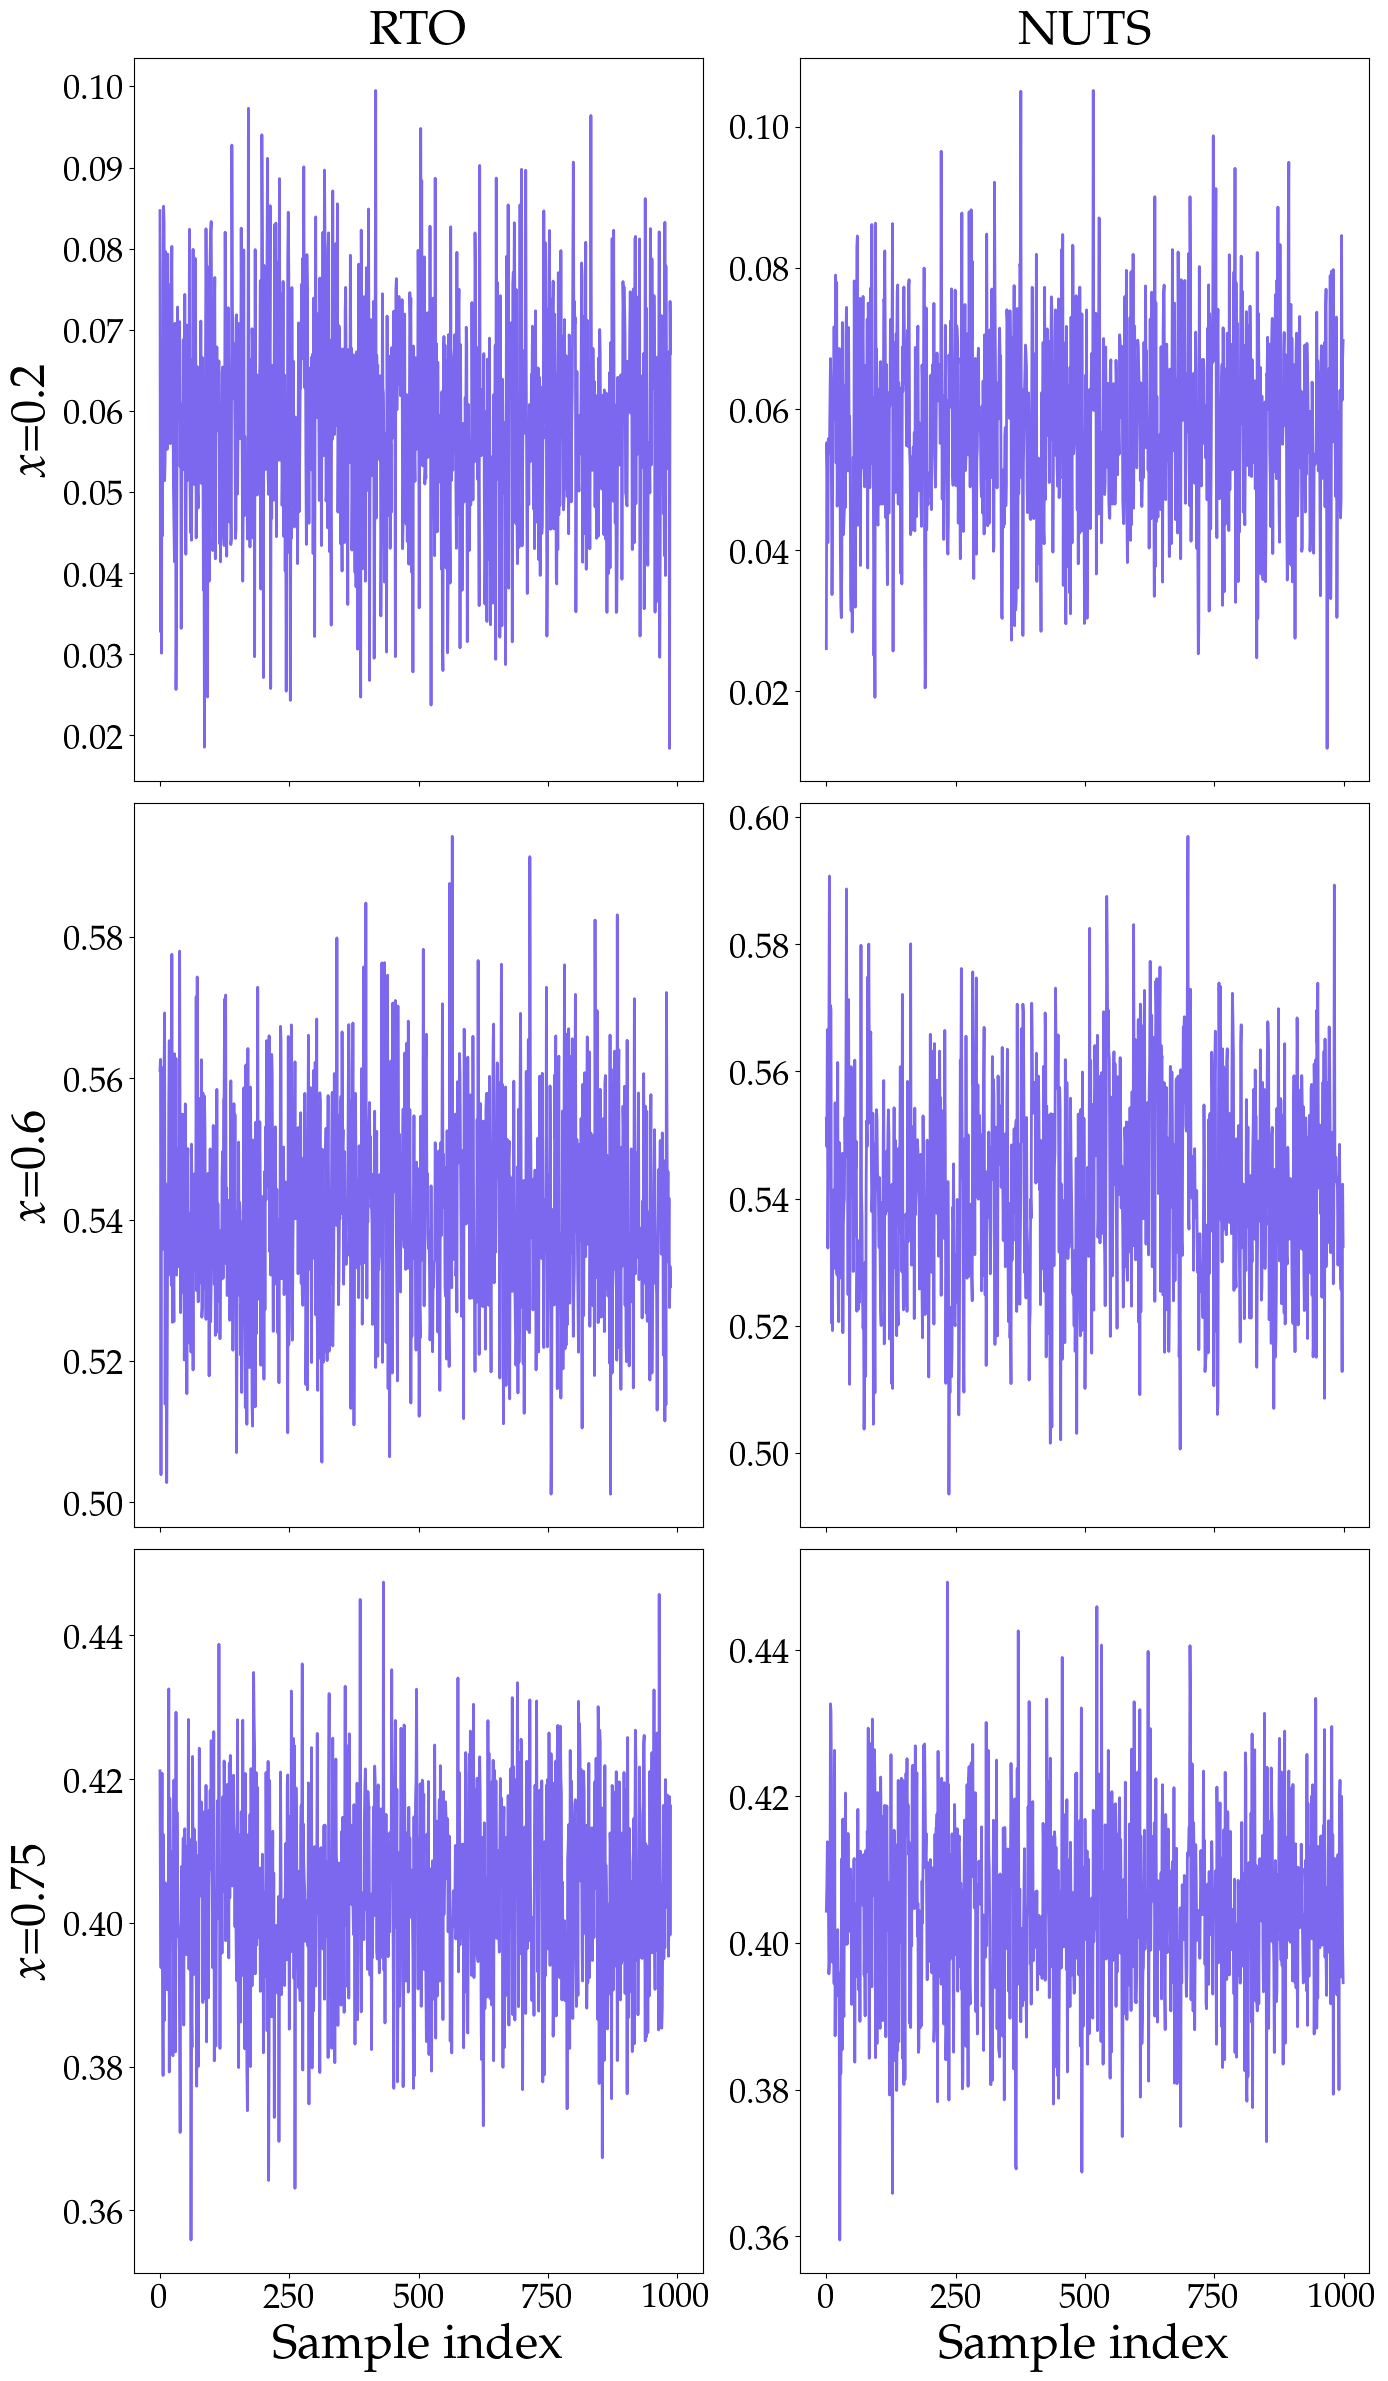

C:\Users\ahor\AppData\Local\Temp\ipykernel_2700\4241498708.py:35: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_rto = az.hdi( rto_samples, circular=True, hdi_prob=0.95 ).T
C:\Users\ahor\AppData\Local\Temp\ipykernel_2700\4241498708.py:41: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_nuts = az.hdi( nuts_samples, circular=True, hdi_prob=0.95 ).T
C:\Users\ahor\AppData\Local\Temp\ipykernel_2700\4241498708.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


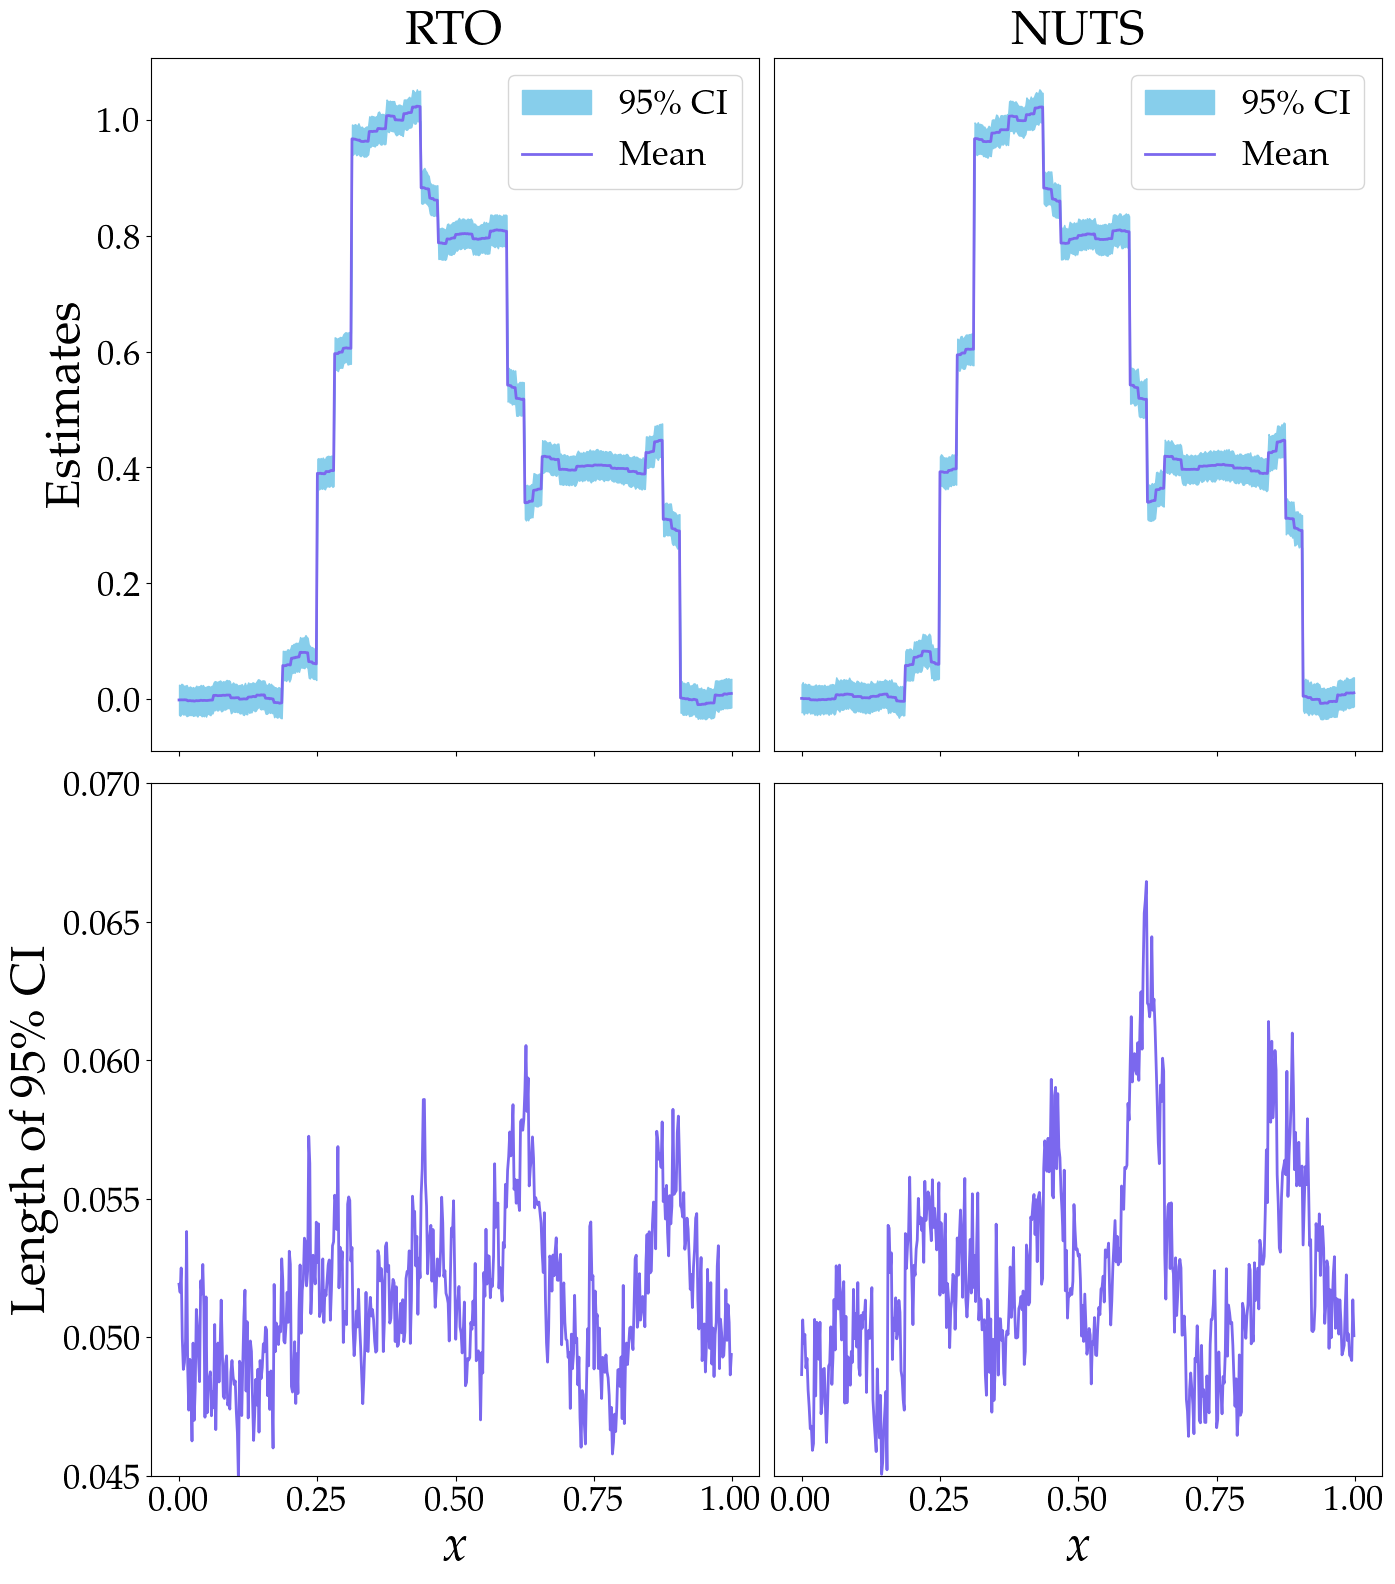

(988, 512)
(1000, 512)


C:\Users\ahor\AppData\Local\Temp\ipykernel_2700\4241498708.py:88: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


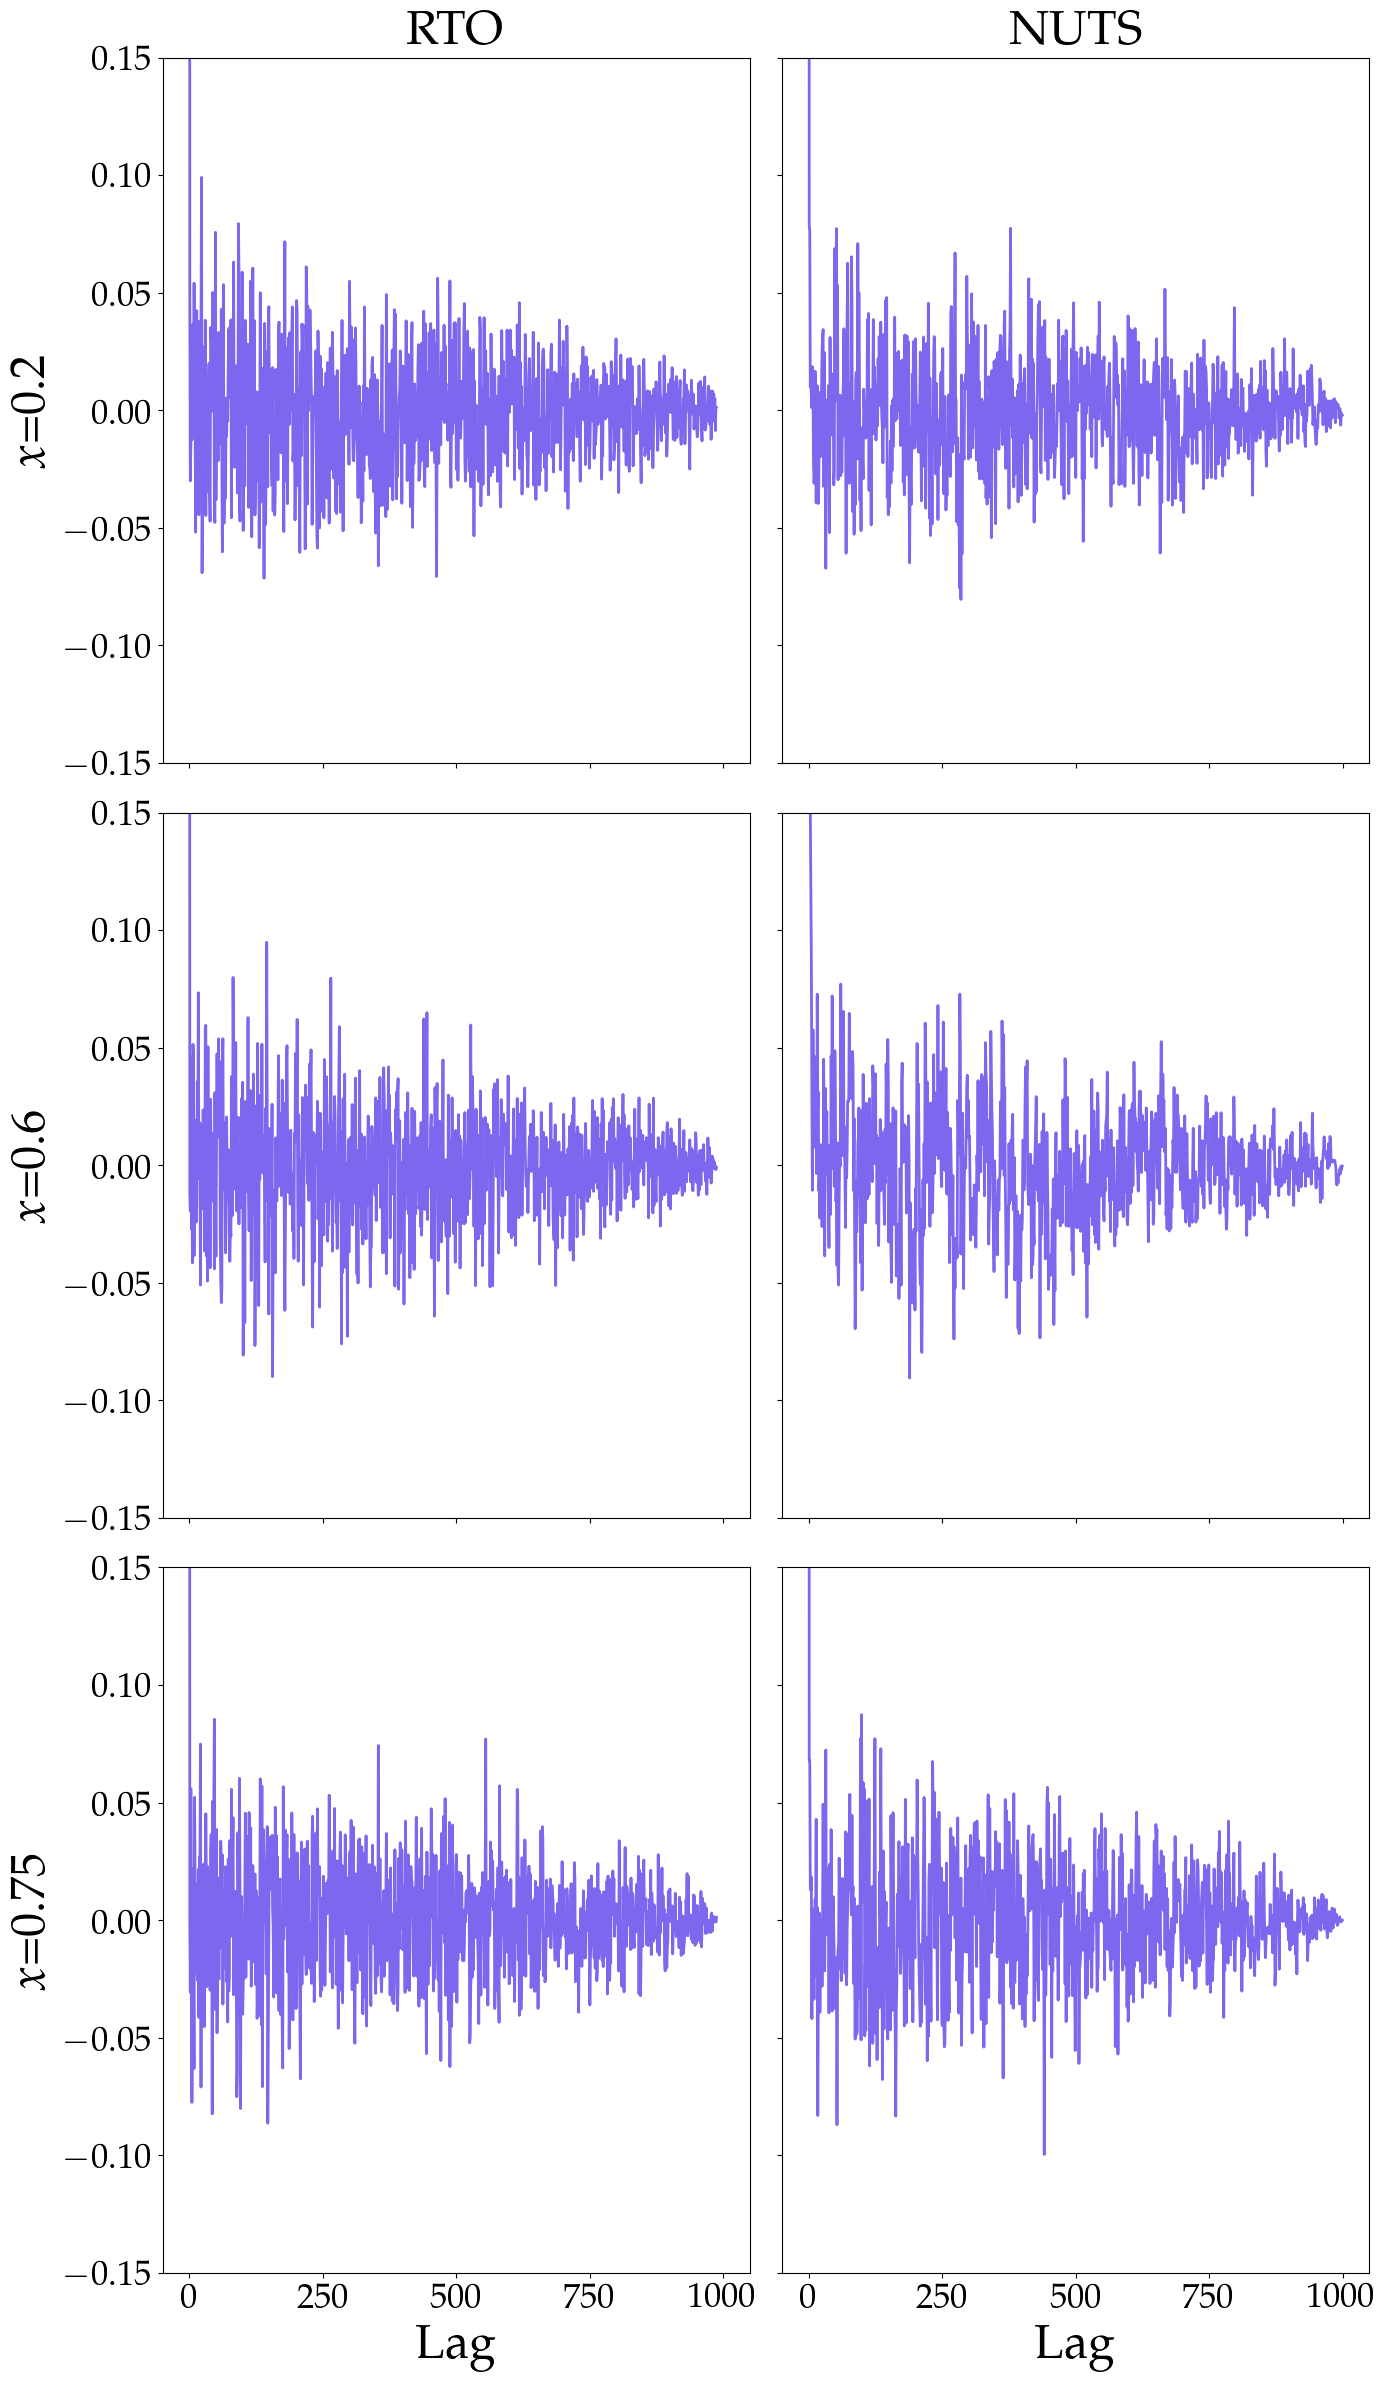

C:\Users\ahor\AppData\Local\Temp\ipykernel_2700\4241498708.py:103: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


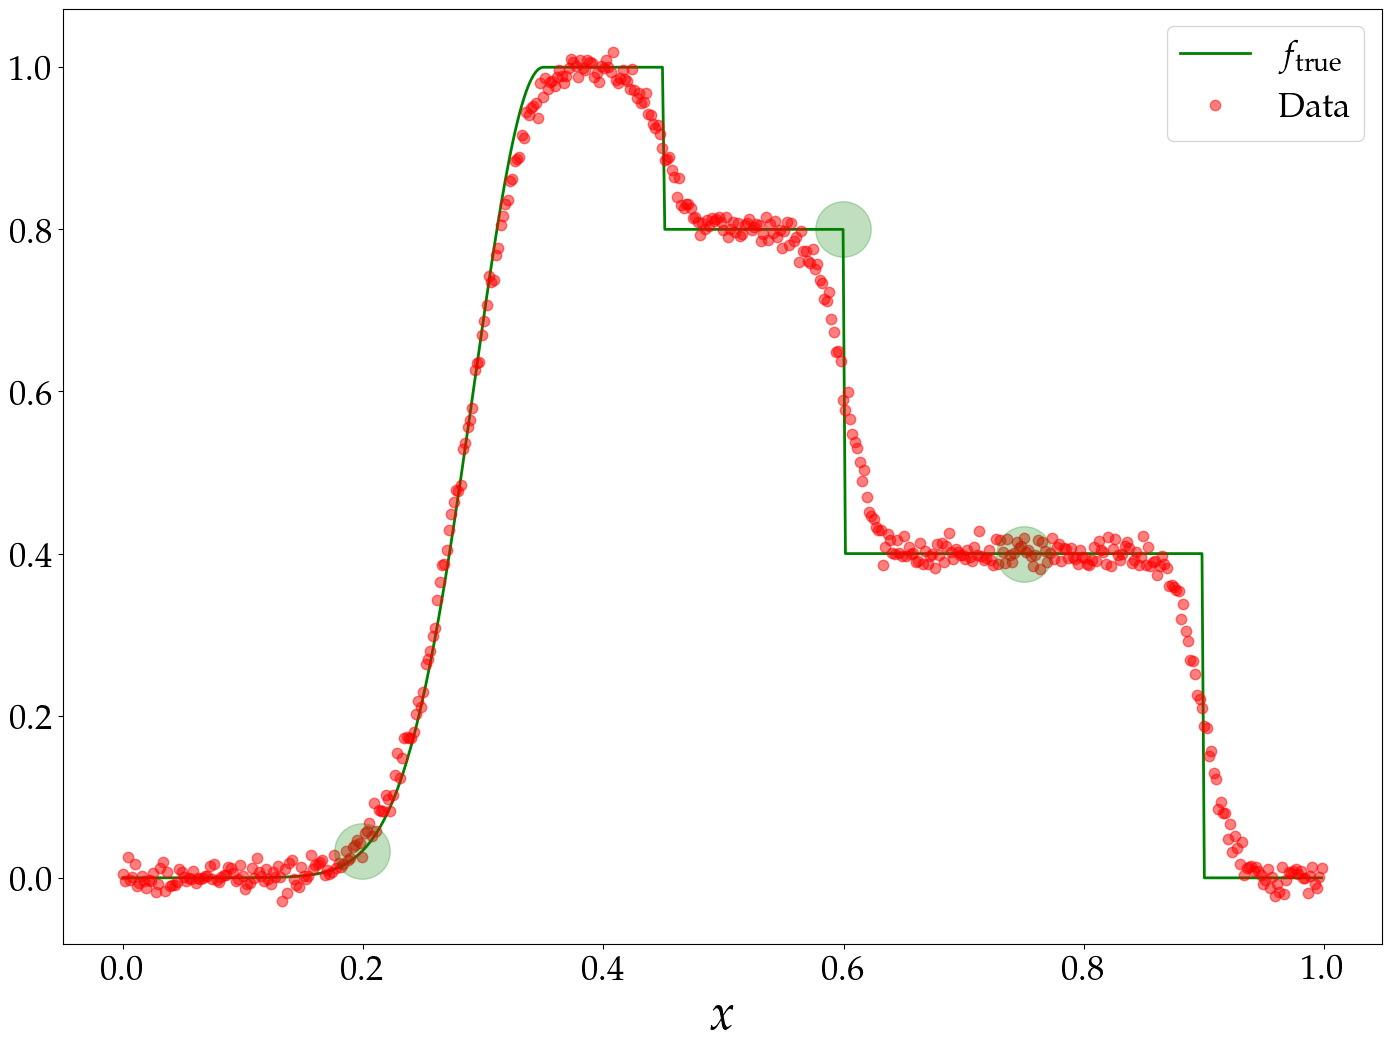

In [3]:
n= 2**9
x=np.linspace(0, 1, n, endpoint=False)
index = 307
chain_RTO = np.load("Comparison_Plot_Data/Comparison_samples_deconvolution_RTO.npy")
RTO_samples = chain_RTO
Mean_RTO = np.mean(RTO_samples,axis=1)
uncertainty_RTO = az.hdi(RTO_samples.T,0.95)
width_RTO = uncertainty_RTO[:,1]-uncertainty_RTO[:,0]
chain_NUTS=np.load("Comparison_Plot_Data/Comparison_samples_deconvolution_NUTS.npy")
Mean_NUTS = np.mean(chain_NUTS,axis=1)
uncertainty_NUTS = az.hdi(chain_NUTS.T,0.95)
width_NUTS = uncertainty_NUTS[:,1]-uncertainty_NUTS[:,0]
Signal = np.load("Comparison_Plot_Data/Convolution_Signal.npy")
Data = np.load("Comparison_Plot_Data/Convolution_Data.npy")
plot_chains(chain_RTO.T, chain_NUTS.T)
plot_uq(chain_RTO.T, chain_NUTS.T)
plot_acf(chain_RTO.T, chain_NUTS.T)
plot_data(Signal,Data)